# Cross Validation With Multiple Algorithms


We will use credit card default data from https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

## Step-1: Download Data

In [2]:
import os
import urllib.request

data_url = 'https://raw.githubusercontent.com/elephantscale/datasets/master/credit-card-default/default.csv'
data_location = os.path.basename(data_url)

if not os.path.exists (data_location):
    print("Downloading : ", data_url)
    urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: default.csv


In [3]:
data = pd.read_csv(data_location)
data.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
17898,17899,10000,1,2,1,27,0,0,0,0,...,9818,10013,9824,1151,1160,1151,346,350,354,0
11817,11818,30000,2,2,1,23,2,2,2,2,...,30892,30500,0,3300,0,2500,0,0,0,0
29870,29871,10000,1,2,2,30,0,0,0,0,...,10105,9471,9669,1158,1210,1200,339,351,394,1
1799,1800,130000,1,3,2,28,0,0,0,0,...,132336,132614,132208,6900,7000,7000,6000,5500,6000,0
14500,14501,240000,2,2,1,29,0,0,2,2,...,219111,211373,211215,16500,0,16007,7,8229,7621,1
1068,1069,200000,1,1,2,40,-1,-1,-1,-1,...,22813,10526,326,1086,2775,22813,10526,326,573,0
1075,1076,100000,1,3,2,47,0,0,0,0,...,38500,4681,76728,3889,2412,1698,679,72809,2748,0
14688,14689,260000,1,2,2,31,0,0,-1,-1,...,16887,149104,127342,1743,24145,16900,150241,5285,942,0
17595,17596,290000,2,1,1,35,-2,-2,-2,-1,...,2262,5205,8114,0,0,2262,3000,3000,0,1
23949,23950,20000,1,3,2,24,1,3,2,0,...,14401,16257,15713,0,0,1300,2101,0,0,1


## Step-2: EDA

In [4]:
## Check data skew
data['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [5]:
data['default'].value_counts(normalize=True)

0   0.78
1   0.22
Name: default, dtype: float64

## Step-3: Clean up 

TODO

## Step-4: Shape data

In [6]:
label_col = 'default'

feature_columns = data.columns
## TODO : drop 'ID' and 'default' columns
feature_columns = feature_columns.drop (['ID', 'default'])
#print (feature_columns)

In [7]:
X = data[feature_columns]
y = data[[label_col]]

print (X.shape)
print (y.shape)

(30000, 23)
(30000, 1)


## Step-5: Cross Validation

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from pprint import pprint

## Choose algorithms, we want to compare
## TODO: Here are we are choosing 'default' algorithm
## What if we choose the 'best of' for each algorithm
## See 'hyper-1' notebook for how to get the best algorithm :-) 

algorithms = []
algorithms.append(('LR', LogisticRegression(max_iter=500)))
algorithms.append(('KNN', KNeighborsClassifier()))
algorithms.append(('CART', DecisionTreeClassifier()))
algorithms.append(('RF', RandomForestClassifier()))
algorithms.append(('GB', GradientBoostingClassifier()))
algorithms.append(('SVM', SVC()))
#algorithms.append(('NB', GaussianNB()))


results = []
names = []
## for classification tasks
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
## for regression tasks
#scoring_metrics = ['r2', 'rmse']
y2 = np.ravel(y)
for name, algo in algorithms:
    print ('\n========= ', name , ' =========')
    kfold = KFold(n_splits=10)
    
    ## cv can be int or kfold
    cv_results = cross_validate(algo, X, y2, cv=5, scoring=scoring_metrics, n_jobs=-1)
    pprint (cv_results)
    # cv_results = cross_val_score(algo, X, y, cv=kfold, scoring=scoring_metric)
    this_result = cv_results['test_accuracy']
    results.append(this_result)
    names.append(name)
    print("\n{}: accuracy : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result), np.median(this_result), np.std(this_result), this_result))



=========  LR  =========
{'fit_time': array([0.40724611, 0.39978719, 0.43680692, 0.41294122, 0.4767158 ]),
 'score_time': array([0.00816727, 0.01385689, 0.00815272, 0.00764942, 0.00736785]),
 'test_accuracy': array([0.7785    , 0.77883333, 0.77883333, 0.77866667, 0.77883333]),
 'test_f1': array([0., 0., 0., 0., 0.]),
 'test_precision': array([0., 0., 0., 0., 0.]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_roc_auc': array([0.6136779 , 0.6323223 , 0.66269859, 0.65994818, 0.6512671 ])}

LR: accuracy : avg=0.78, median=0.78,  std=0.00,  cv_results=[0.7785     0.77883333 0.77883333 0.77866667 0.77883333]

=========  KNN  =========
{'fit_time': array([0.04030514, 0.008461  , 0.0224247 , 0.03671026, 0.02300477]),
 'score_time': array([12.73745084, 12.66486311, 12.84233952, 12.56182599, 12.80649805]),
 'test_accuracy': array([0.7495    , 0.74966667, 0.752     , 0.76133333, 0.763     ]),
 'test_f1': array([0.23666836, 0.22816033, 0.26843658, 0.25726141, 0.24361702]),
 'test_precision

## Step-6: Vizualize Results

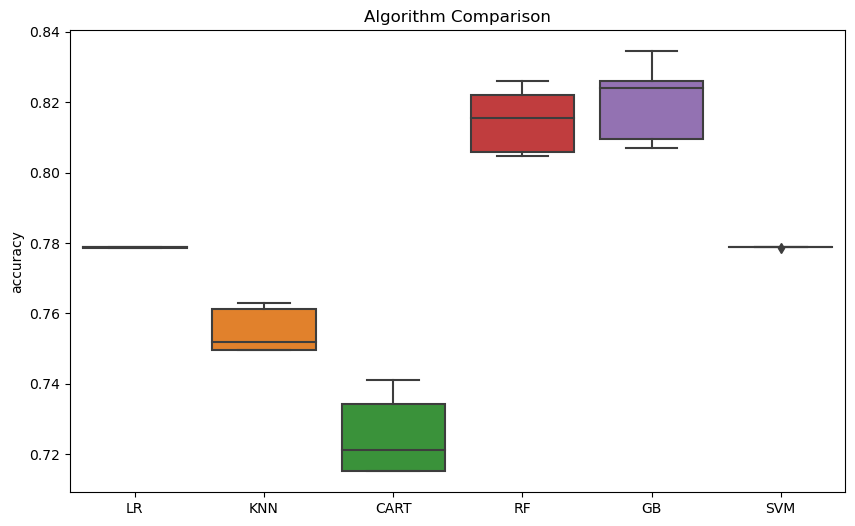

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))

# boxplot algorithm comparison
ax = sns.boxplot(data=results)
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('accuracy')
plt.show()